## Standardization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df=df.iloc[:,2:]
#df=df.loc[:,['Age','EstimatedSalary','Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],
                                                       test_size=0.3)
x_train.shape,x_test.shape

((280, 2), (120, 2))

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [8]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [9]:
x_train_scaled

,Age,EstimatedSalary
0,-0.605921,-0.108216
1,-0.023238,0.129902
2,0.073876,0.040608
3,-1.188605,0.308490
4,-1.382833,-1.477394
...,...,...
275,-0.217466,-0.286804
276,0.656559,2.064609
277,-0.508808,1.409785
278,-1.674175,0.368020


In [10]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.2,69635.7
std,10.3,33657.0
min,18.0,15000.0
25%,29.0,43000.0
50%,37.0,72000.0
75%,45.0,87000.0
max,60.0,150000.0


In [11]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.0,0.1
75%,0.8,0.5
max,2.2,2.4


Text(0.5, 1.0, 'After Scaling')

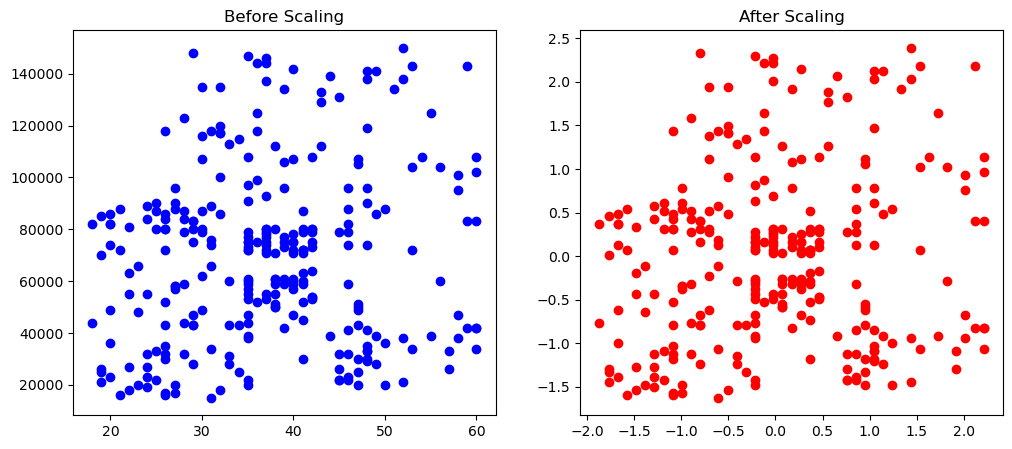

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'],color='blue')
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')


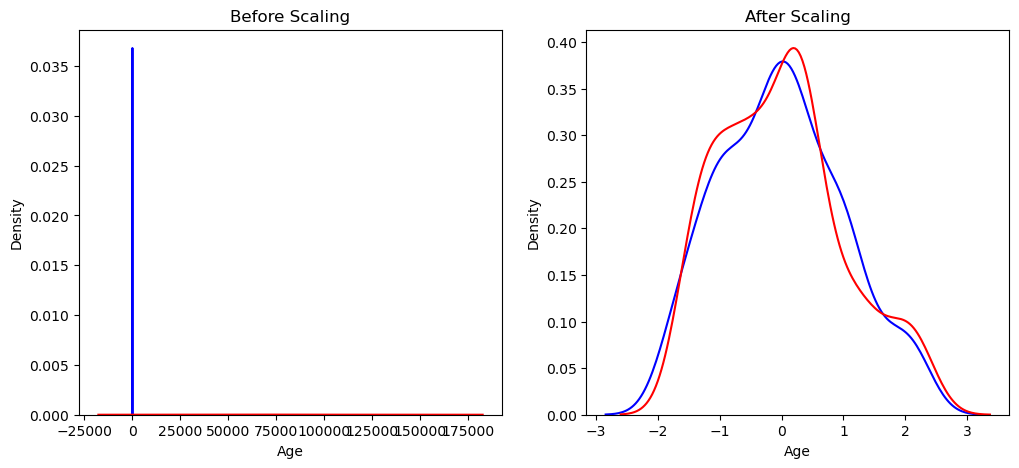

In [13]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x_train['Age'],color='blue',ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1,color='r')
ax1.set_title('Before Scaling')

#AFTER SCALING
sns.kdeplot(x_train_scaled['Age'],color='blue',ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],color='red',ax=ax2)
ax2.set_title('After Scaling')
plt.show()